Best five cereals among the dataset using the guidelines outlined in the US Governments Dietary Guidelines'Executive Summary


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [2]:
cereal_df = pd.read_csv("Cereals.csv")
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


Lets check for NaN values

In [3]:
print('NaN values:', cereal_df.isnull().values.any())
cereal_df.info()

NaN values: True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


Statistics descriptives of the columns

In [5]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


From the result above we can see that several columns use -1 as value to represent missing information.
For this machine learning problem we are going to use different methods to replace the missing values such as the use of column or manufacturer mean or simply replace the value with zero.

Lets convert -1 values to NaN

In [6]:
cereal_df = cereal_df.applymap(lambda x: np.nan if x== -1 else x)

In [7]:
cereal_df = cereal_df.dropna(axis='index', how='any')
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


Let's drop the columns for shelf and rating since they are irrelevant to our problem

In [8]:
cereal_df = cereal_df.drop(['shelf','rating'], axis=1)

We can see that the cereals listed are defined as one serving. But the serving size and weight are not uniformed. Let's normalize the size of weight to 1.0 ounce for the sample information. 

Normalization of the sample values to a weight or volume metric for impartial comparison.

In [9]:
print('weight \n', cereal_df['weight'].value_counts(),'\n')
print('cups \n', cereal_df['cups'].value_counts())

weight 
 1.00    61
1.33     5
0.50     2
1.50     2
1.25     2
0.83     1
1.30     1
Name: weight, dtype: int64 

cups 
 1.00    29
0.75    15
0.67    12
0.50     7
0.33     3
0.88     2
1.50     1
1.33     1
1.13     1
0.80     1
0.25     1
1.25     1
Name: cups, dtype: int64


Let's copy the data for further consideration


In [10]:
non_normal_df = cereal_df.copy()

Lets create a newdata set from numerical columns only
Lets normalize each row by its corresponding weight to 1.0 ounce
Lets check the normalization

In [11]:
num_df = cereal_df.select_dtypes(include=[np.number])
weight_norm_df = num_df.div(num_df['weight'],axis='rows')
print('weight \n', weight_norm_df['weight'].value_counts())

weight 
 1.0    74
Name: weight, dtype: int64


Let's replace the original numerical columns with the weight normalized values

In [12]:
cereal_df[weight_norm_df.columns]= weight_norm_df

Lets drop the weight and cups columns now. All weight values should be 1.0 ounce and cups are irrelevant.

In [13]:
cereal_df.drop(columns=['weight','cups'], axis=1 , inplace=True)

We do have a lot of informations to process 
Lets throw all the columns into a large seaborn Pairgrid and check if there are any correlations

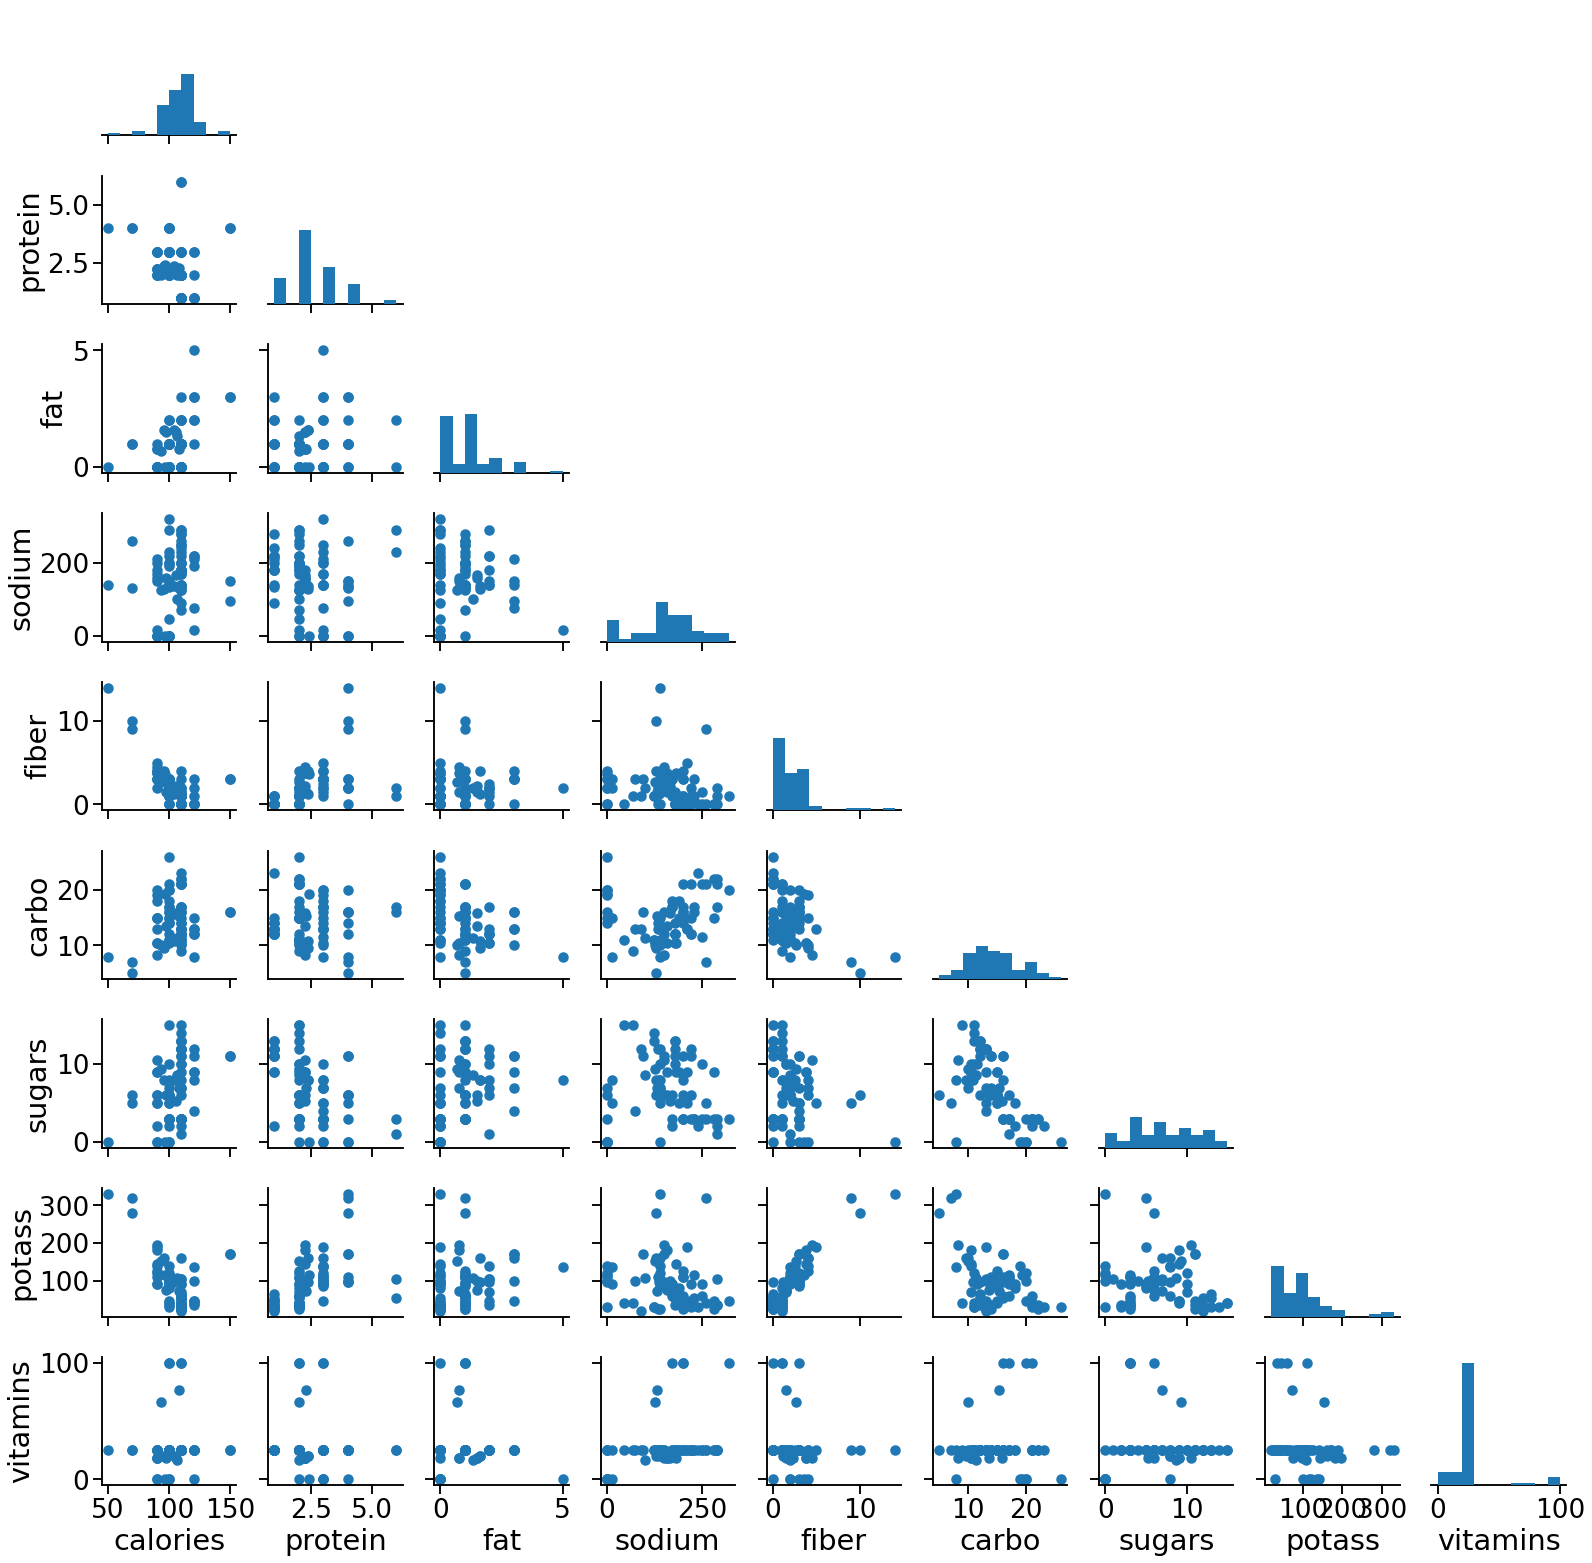

In [14]:
sns.set_context('talk', font_scale = 1.6)
cereal_g = sns.PairGrid(cereal_df, corner=True)
#Lets use different plot on diagonal
cereal_g.map_diag(plt.hist)
# Lets use type of plot for lower half of the grid
cereal_g.map_lower(plt.scatter)

Key Recommendations from the Dietary Guidelines are :
Focus on nutrient density, variety, and amount
Limit calories from added sugars and saturated fats and reduce sodium intake.
Variety and amount are refered to food selection in general and are not relevant to our cereal selection.
Nutrient dense food are those with high in natural minerals , vitamins,and other naturally substances such as fiber.
Therefore based on the guidelines our selection should contain high protein, fiber, potassium, and vitamins.
More strict guidelines are given for sugars, saturated fats, and sodium.

Consume less than 10 percent of calories per day from added sugars
Consume less than 10 percent of calories per day from saturated fats
Consume less than 2,300 milligrams (mg) per day of sodium


To get started, let's first take a look at our "good" variables: protein, fiber, potassium, and 'vitamins'. Vitamins appear to be more categorical (there were only 3 values before our weight normalization created a few more). As fiber and potassium see strongly correlated, we can plot protein against potassium and it will give us a general sense of the relation to fiber.

Normalizing by weights created some new vitamin values 

In [20]:
# Seaborn size setting

sns.set_context('paper',font_scale = 1.8)

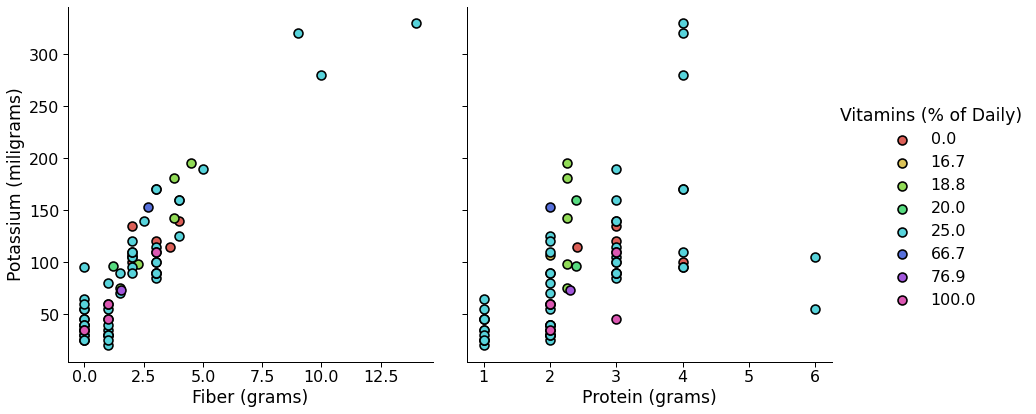

In [22]:
# PairGrid

cereal_g = sns.PairGrid(cereal_df, hue='vitamins',
                       x_vars=['fiber','protein'],
                       y_vars=['potass'],
                       height=6, aspect=1,
                       palette='hls',
                       )

# Let's use scatter plots for our grid

cereal_g.map(plt.scatter,**{'edgecolor':'k', 's':80, 'linewidth':1.6})

# Changing symbols on plot

cereal_g.add_legend(title='Vitamins (% of Daily)')

# Applying nice labels

cereal_g.axes[0,0].set_xlabel('Fiber (grams)')
cereal_g.axes[0,1].set_xlabel('Protein (grams)')
cereal_g.axes[0,0].set_ylabel('Potassium (miligrams)')

# Plot Good_variables

plt.savefig('Good_variables.png')


Based on the result above from the scatter plot , there is no strong selection for our Good_variables. The values with the best protein do not have the highest vitamin percentage, or potassium, and the higher values of fiber do not have a strong presence of vitamins as well, therefore the best cereals do not stand out clearly.

let's use instead the limits for our bad variables.

to consider fat and sugar as a percentage of calories, we have to convert them into calories based on the FDA given conversion which are respectively 1 gram of fat is 9 calories , and 1 gram of sugar is 4 calories.

In [23]:
# let's use loop to apply a simple lambda function conversion to each column

col_list = ['fat','sugars']
cal_conv = [9,4]
for col,val in zip(col_list, cal_conv):
    cereal_df[col] = cereal_df[col].apply(lambda x: x*val)

In [24]:
# Let's create a new column so we can mark those samples which meet the sugar limit and those that dont.

cereal_df['sugars_criteria'] = cereal_df.apply(lambda row: 1 if row.sugars/row.calories < 0.1 else 0, axis=1)

In [26]:
#By the FDA the recommended intake of salt is 2300mg while the daily caloric intake is more varried, therefore let's use 2000 calories as estimator
daily_cal= 2000
daily_salt= 2300

Removes rows from a DataFrame that are selected by a given variable criteria.
For fats and sugars, that is more than 10% of total calories.
For vitamins and sodium it is the proportion of daily intake compared to percentage of daily calorie intake.
    

In [150]:
input_df=pd.DataFrame
col:str
output_df=pd.DataFrame
def cal_compare_df(input_df, col='sugars'):
    output_df = input_df.copy()
    if col == 'sodium':
        output_df[col] = output_df.apply(lambda row: row[col] if (row.sodium/daily_salt) < (row.calories/daily_cal) else np.NaN, axis=1)
    elif col == 'vitamins':
        output_df[col] = output_df.apply(lambda row: row[col]if (row.calories/daily_cal) < row[col] else np.NaN, axis=1) 
    else:
        output_df[col] = output_df.apply(lambda row: row[col] if row[col]/row.calories < 0.1 else np.NaN, axis=1)
    return output_df.dropna(axis='index', how='any')    
 
        

In [187]:
#x is 1/10 of y
x_line_10 = np.linspace(-0,70)
y_line_10 = x_line_10*10
df=pd.DataFrame
tittle:str
col:str
ylabel:bool
legend:bool
def cal_compare_plot(df, title=None, col='sugars', ylabel=False, legend=False):
    plt.plot(x_line_10, y_line_10, linewidth=4, linestyle='--', color='k')
    x1 = df[col].loc[df[col+'_criteria'] == 1]
    y1 = df['calories'].loc[df[col+'_criteria'] == 1]
    plt.scatter(x1, y1, color='g',s=70,
           edgecolor='k',linewidth=1.8, label='Good',zorder=20)
    x0 = df[col].loc[df[col+'_criteria'] == 0]
    y0 = df['calories'].loc[df[col+'_criteria'] == 0]
    plt.scatter(x0, y0, color='r', s=70,
           edgecolor='k', linewidth=1.8, label='Bad', zorder=20)
    plt.ylim(40,160)
    plt.xlim(-5,65)
    plt.title(title)
    plt.xlabel('Sugars (calories)')
    if ylabel:
        plt.ylabel('Calories (per serving)')
    else:
        plt.gca().set(yticklabels=[])
        
    if legend:
        plt.legend(loc='lower right')

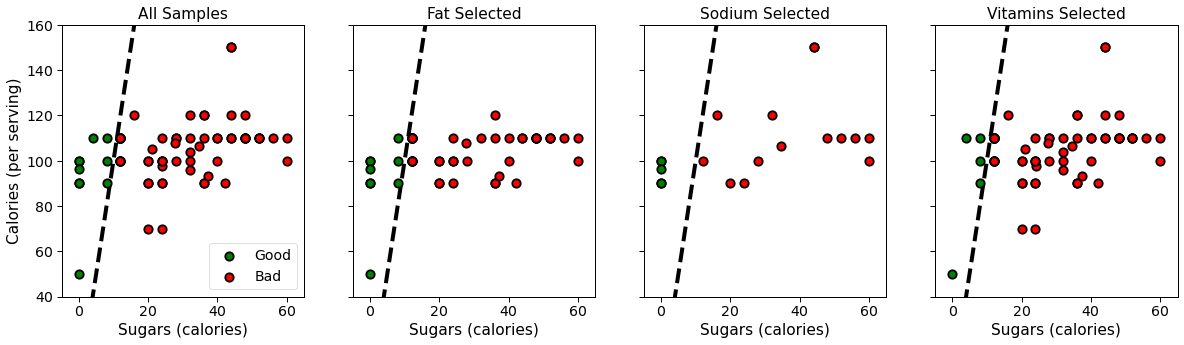

In [190]:
sns.set_context('paper', font_scale = 1.6)
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.sca(axes[0])
cal_compare_plot(cereal_df, title='All Samples', ylabel=True, legend=True)
select_list = ['fat','sodium','vitamins']
title_list = ['Fat Selected', 'Sodium Selected', 'Vitamins Selected']
for i, (col, title) in enumerate(zip(select_list, title_list)):
    plt.sca(axes[i+1])
    select_df = cal_compare_df(cereal_df, col=col)
    cal_compare_plot(select_df)
    plt.title(title)
plt.savefig('Bad_variables_selected.png')    

The dashed line represents the threshold of 10% of the calories being sugar. The green dots are those with samples with <10% while the red dots are those with >10%. Unfortunately, one can see when we remove those samples which do not fit other criteria (e.g., sodium above the recommended amount) there are no 5 cereals which satisfy all guidelines.

So there are no obvious, healthy cereals which stand above the others. Instead let's select the best ones we can. We can define a metric by giving a score for each sample calculated from a sum of its rank in each variable column. To ensure good scoring, instead of using the position of each sample in a sorted column for a score value, we can bin the column value ranges and give each sample a value in that column based on which bin it falls into.

To clarify, the vitamins column has ~50 samples with a value of 25. Those 50 values are tied, but would have a different score based on how they would appear in the sorted column despite having the same value. Instead, if we bin the data and give each of the 50 mentioned samples a score value of (for example) 5 this would give much better results.




Let's calculate the metric score so the higher is "healthier"

In [195]:
#A higher rank score is "healthier"
input_df=pd.DataFrame
bins:int
work_df:pd.DataFrame
def cereal_ranker(input_df, bins=8):
    cols = ['vitamins','protein', 'potass', 'fiber', 'fat', 'sodium', 'sugars']
    order_method = ['max','max','max','max','min','min','min']
    work_df = input_df.copy()
    work_df['rank'] = 0 
    conv_array = np.unique(work_df['vitamins'])
    conv_dict = dict(zip(conv_array,np.arange(1, len(conv_array)+1))) 
    work_df['vitamins'] = work_df.apply(lambda row: conv_dict[row.vitamins], axis=1 )
    for name, selector in zip(cols, order_method):
        labels = np.arange(1, bins+1)
        if selector == 'min':
             labels = labels[::-1]
        work_df['rank'] += pd.cut(work_df[name], bins, labels=labels).to_numpy() 
    return work_df

ranked_df = cereal_ranker(cereal_df, bins=8).sort_values('rank', ascending=False)
ranked_df.head(8)

Now we have the best five cereals 

3 All-Bran with Extra Fiber
0 100% Bran
2 All-Bran
64 Shredded Wheat 'n'Bran
26 Frosted Mini-Wheats

In [197]:
ranked_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,sugars_criteria,rank
3,All-Bran_with_Extra_Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,5,1,47
0,100%_Bran,N,C,70.0,4.0,9.0,130.0,10.0,5.0,24.0,280.0,5,0,40
2,All-Bran,K,C,70.0,4.0,9.0,260.0,9.0,7.0,20.0,320.0,5,0,39
64,Shredded_Wheat_'n'Bran,N,C,90.0,3.0,0.0,0.0,4.0,19.0,0.0,140.0,1,1,36
26,Frosted_Mini-Wheats,K,C,100.0,3.0,0.0,0.0,3.0,14.0,28.0,100.0,5,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,Golden_Grahams,G,C,110.0,1.0,9.0,280.0,0.0,15.0,36.0,45.0,5,0,21
14,Cocoa_Puffs,G,C,110.0,1.0,9.0,180.0,0.0,12.0,52.0,55.0,5,0,21
35,Honey_Graham_Ohs,Q,C,120.0,1.0,18.0,220.0,1.0,12.0,44.0,45.0,5,0,19
12,Cinnamon_Toast_Crunch,G,C,120.0,1.0,27.0,210.0,0.0,13.0,36.0,45.0,5,0,19


In [205]:
#Scatter plot for input x and y columns
df:pd.DataFrame
x: str
y: str
colobar:bool
def rank_scatter(input_df,x,y, colorbar=False):
    x_vals = input_df[x]
    y_vals = input_df[y]
    c_vec = input_df['rank']
    plt.scatter(x_vals, y_vals, c=c_vec, cmap='jet_r',s=80, edgecolor='k', linewidth=2.5)
    if colorbar:
        cbar = plt.colorbar()
        cbar.set_label('Metric Score', labelpad=10)

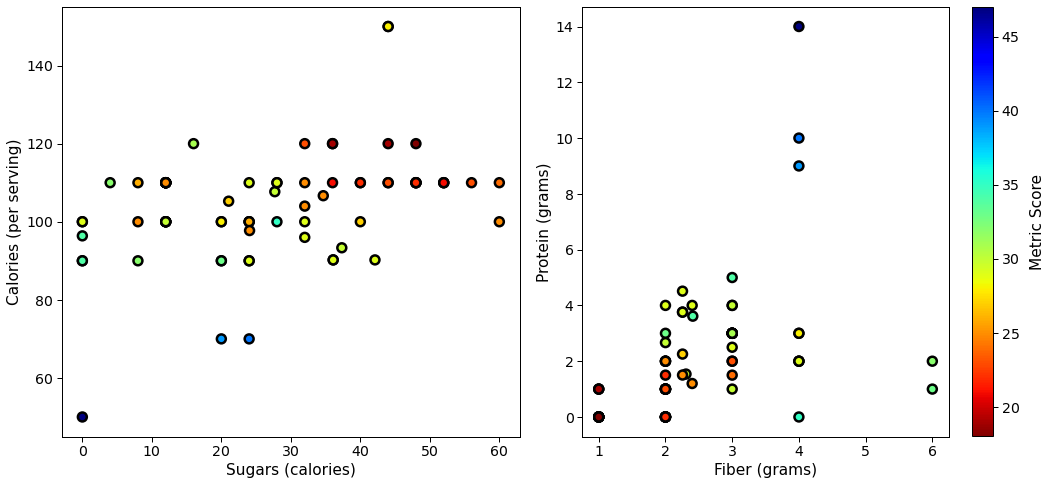

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.sca(axes[0])
rank_scatter(ranked_df,'sugars','calories')
plt.xlabel('Sugars (calories)')
plt.ylabel('Calories (per serving)')
plt.sca(axes[1])
rank_scatter(ranked_df,'protein','fiber', colorbar=True)
plt.xlabel('Fiber (grams)')
plt.ylabel('Protein (grams)')

plt.tight_layout()
plt.savefig('Metric_plot.png')

Using a metric score to rank our cereals allows us to clearly plot the distribution. We can see that metric scores tend to increase towards lower 'bad' variables like sugar, and increase towards higher 'good' variables like fiber and protein. Therefore, the metric score gives us an indicator of how healthy a cereal is in relation to all variables.